In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

# Importing & Setup Data Visualisation Related Libraries
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Data Visualisation Setup Complete")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Data Visualisation Setup Complete
data/substrate_scan.csv
data/Scan_2.xlsx


In [5]:
all_substrate_df = pd.read_csv('data/substrate_scan.csv')

In [6]:
all_substrate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4320 non-null   object 
 1   Iteration  4320 non-null   int64  
 2   X          4320 non-null   int64  
 3   Y          4320 non-null   int64  
 4   Z          4320 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 168.9+ KB


<AxesSubplot:xlabel='Y', ylabel='Z'>

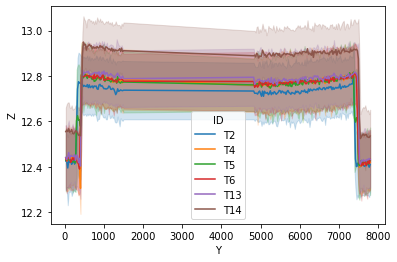

In [8]:
#Plotting all Test Samples
sns.lineplot(data=all_substrate_df, x='Y', y='Z', hue='ID')

In [27]:
t2_substrate_df = all_substrate_df[all_substrate_df.ID == 'T2']

<AxesSubplot:xlabel='Y', ylabel='Z'>

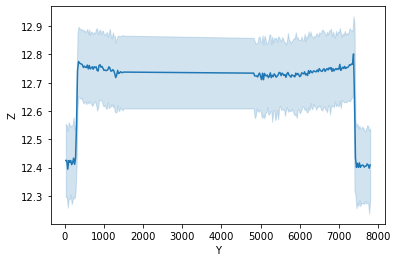

In [13]:
sns.lineplot(data=t2_substrate_df, x='Y', y='Z')

In [14]:
t2_substrate_df.describe()

,Iteration,X,Y,Z
count,720.000000,720.000000,720.000000,720.000000
mean,360.500000,2100.000000,4462.500000,12.690111
std,207.990384,886.618178,2723.554726,0.178715
min,1.000000,1000.000000,25.000000,12.202000
25%,180.750000,1375.000000,1143.750000,12.567000
50%,360.500000,2100.000000,5562.500000,12.666000
75%,540.250000,2825.000000,6681.250000,12.863000
max,720.000000,3200.000000,7800.000000,13.017000


In [17]:
t2_z_min = t2_substrate_df.Z.min()
t2_substrate_df.Z - t2_z_min

0      0.118
1      0.143
2      0.113
3      0.143
4      0.138
       ...  
715    0.326
716    0.336
717    0.341
718    0.306
719    0.321
Name: Z, Length: 720, dtype: float64

In [28]:
normalized_df=(t2_substrate_df-t2_substrate_df.mean())/t2_substrate_df.std()

In [29]:
normalized_df

,ID,Iteration,X,Y,Z
0,NaN,-1.728445,-1.240669,-1.629305,-2.070953
1,NaN,-1.723637,-1.240669,-1.620125,-1.931066
2,NaN,-1.718829,-1.240669,-1.610946,-2.098930
3,NaN,-1.714022,-1.240669,-1.601767,-1.931066
4,NaN,-1.709214,-1.240669,-1.592588,-1.959043
...,...,...,...,...,...
715,NaN,1.709214,1.240669,1.188704,-0.907091
716,NaN,1.714022,1.240669,1.197883,-0.851136
717,NaN,1.718829,1.240669,1.207062,-0.823159
718,NaN,1.723637,1.240669,1.216241,-1.019001


<AxesSubplot:xlabel='Y', ylabel='Z'>

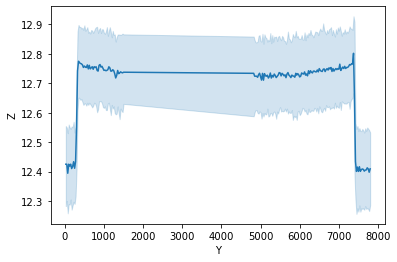

In [33]:
sns.lineplot(data=t2_substrate_df, x='Y', y='Z')

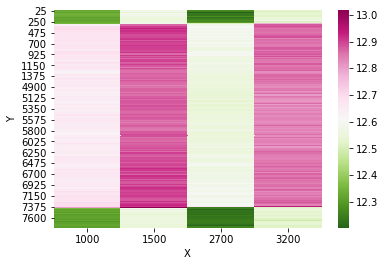

In [45]:
t2_substrate_df_pivoted = t2_substrate_df.pivot("Y", "X", "Z")
ax = sns.heatmap(t2_substrate_df_pivoted, cmap="PiYG_r")
plt.show()

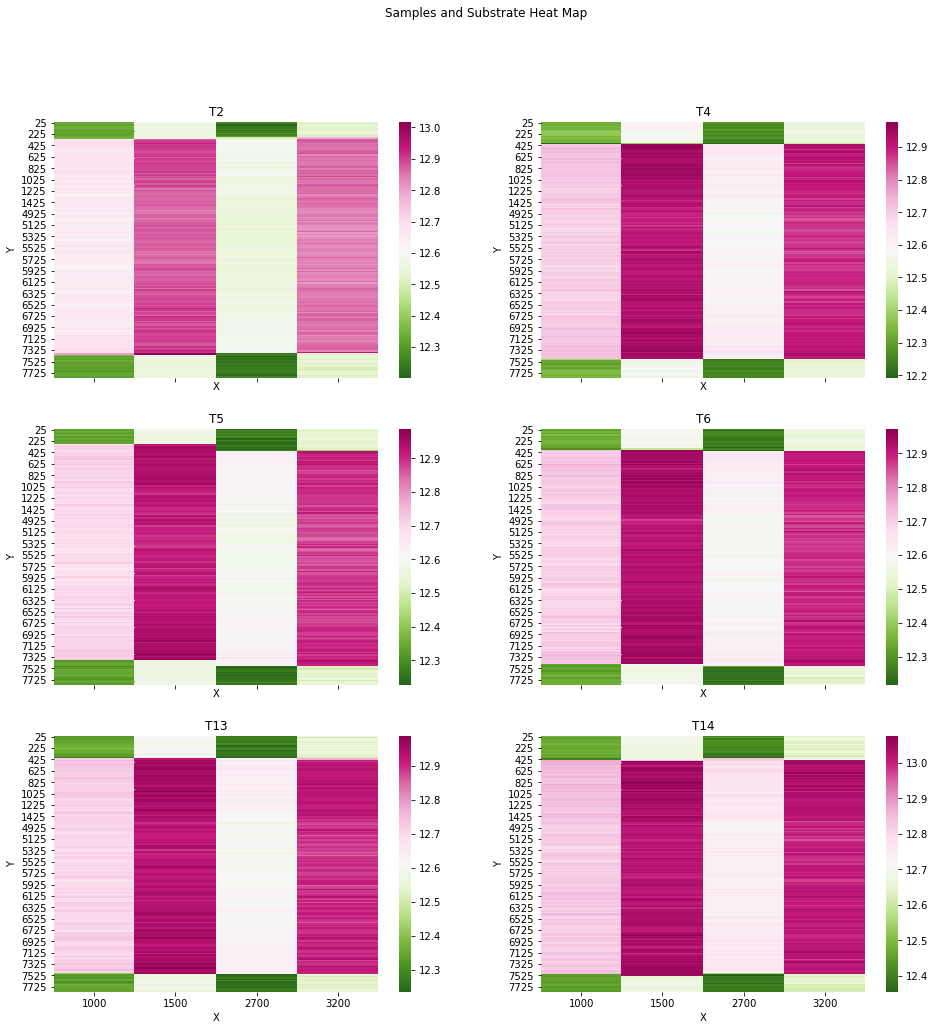

In [50]:
samples = ['T2','T4','T5','T6','T13','T14']

fig, axes = plt.subplots(3, 2, sharex=True, figsize=(16,16))
fig.suptitle('Samples and Substrate Heat Map')

row = 0
column = 0

for sample in samples:
    ax = axes[row, column]
    ax.set_title(sample)
    substrate_df = all_substrate_df[all_substrate_df.ID == sample]
    substrate_df_pivoted = substrate_df.pivot("Y", "X", "Z")
    sns.heatmap(ax=axes[row, column], data=substrate_df_pivoted, cmap="PiYG_r")
    
    column = column + 1
    if column > 1:
        row = row + 1
        column = 0